In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Read csv w/out header
data = pd.read_csv('../data/Capital_Flats_2021-12-01_14_20_34.csv', header=None, low_memory=False)

# Forward fill the header name for each PowerScout
data.iloc[0] = data.T[0].fillna(method='ffill')

# Rename the 'nan' block
data.loc[0, 0] = 'Timestamp'

# Create the multi-index
data.columns = [list(data.iloc[0]), list(data.iloc[1])]

# Drop the first two rows because they're just the column names, and any column with only nulls
data = data[2:]

# Convert timestamp column to datetime format
data.Timestamp = pd.to_datetime(data.Timestamp.Timestamp, infer_datetime_format=True)

# Set Timestamp column as index, set columns to type 'float', rename index
data = data.set_index([('Timestamp', 'Timestamp')]).replace('-', np.nan).astype(float)
data.index.rename('Timestamp', inplace=True)

# Drop any column or row with all nulls
data = data.dropna(how='all', axis=1).dropna(how='all', axis=0)

In [29]:
# Slice to the two power systems we're monitoring
gross_power_cols = ['PowerScout DPS126', 'PowerScout DPS121']
gross_power = data[gross_power_cols]

In [30]:
gross_power.head(1)

PowerScout DPS126                                     \
                       L-L Avg. (VAC) L-N Avg. (VAC) L12 (VAC) L23 (VAC)   
Timestamp                                                                  
2021-11-30 23:59:00             214.1          123.5     214.3     213.9   

                                                               \
                    L13 (VAC) Freq. (Hz) True Energy 01 (kWh)   
Timestamp                                                       
2021-11-30 23:59:00     213.8       60.2             119048.6   

                                                               \
                    True Energy 02 (kWh) True Energy 03 (kWh)   
Timestamp                                                       
2021-11-30 23:59:00             118502.4             116756.6   

                                        ... PowerScout DPS121                  \
                    True Power 01 (kW)  ...        L3-N (VAC) True Power (kW)   
Timestamp                               ...                                     
2021-11-30 23:59:00              -0.03  ...             123.6            19.8   

                                                                \
                    Total Energy (kWh) Reactive Energy (kVARh)   
Timestamp                                                        
2021-11-30 23:59:00          -631114.4                 69850.8   

                                                                \
                    Reactive Power (kVAR) Apparent Power (kVA)   
Timestamp                                                        
2021-11-30 23:59:00                  -2.2                 20.5   

                                                                  
                    Apparent Energy (kVAh)  dPF  aPF Current (A)  
Timestamp                                                         
2021-11-30 23:59:00              -458585.9 -0.3 -0.3       166.3  

[1 rows x 96 columns]

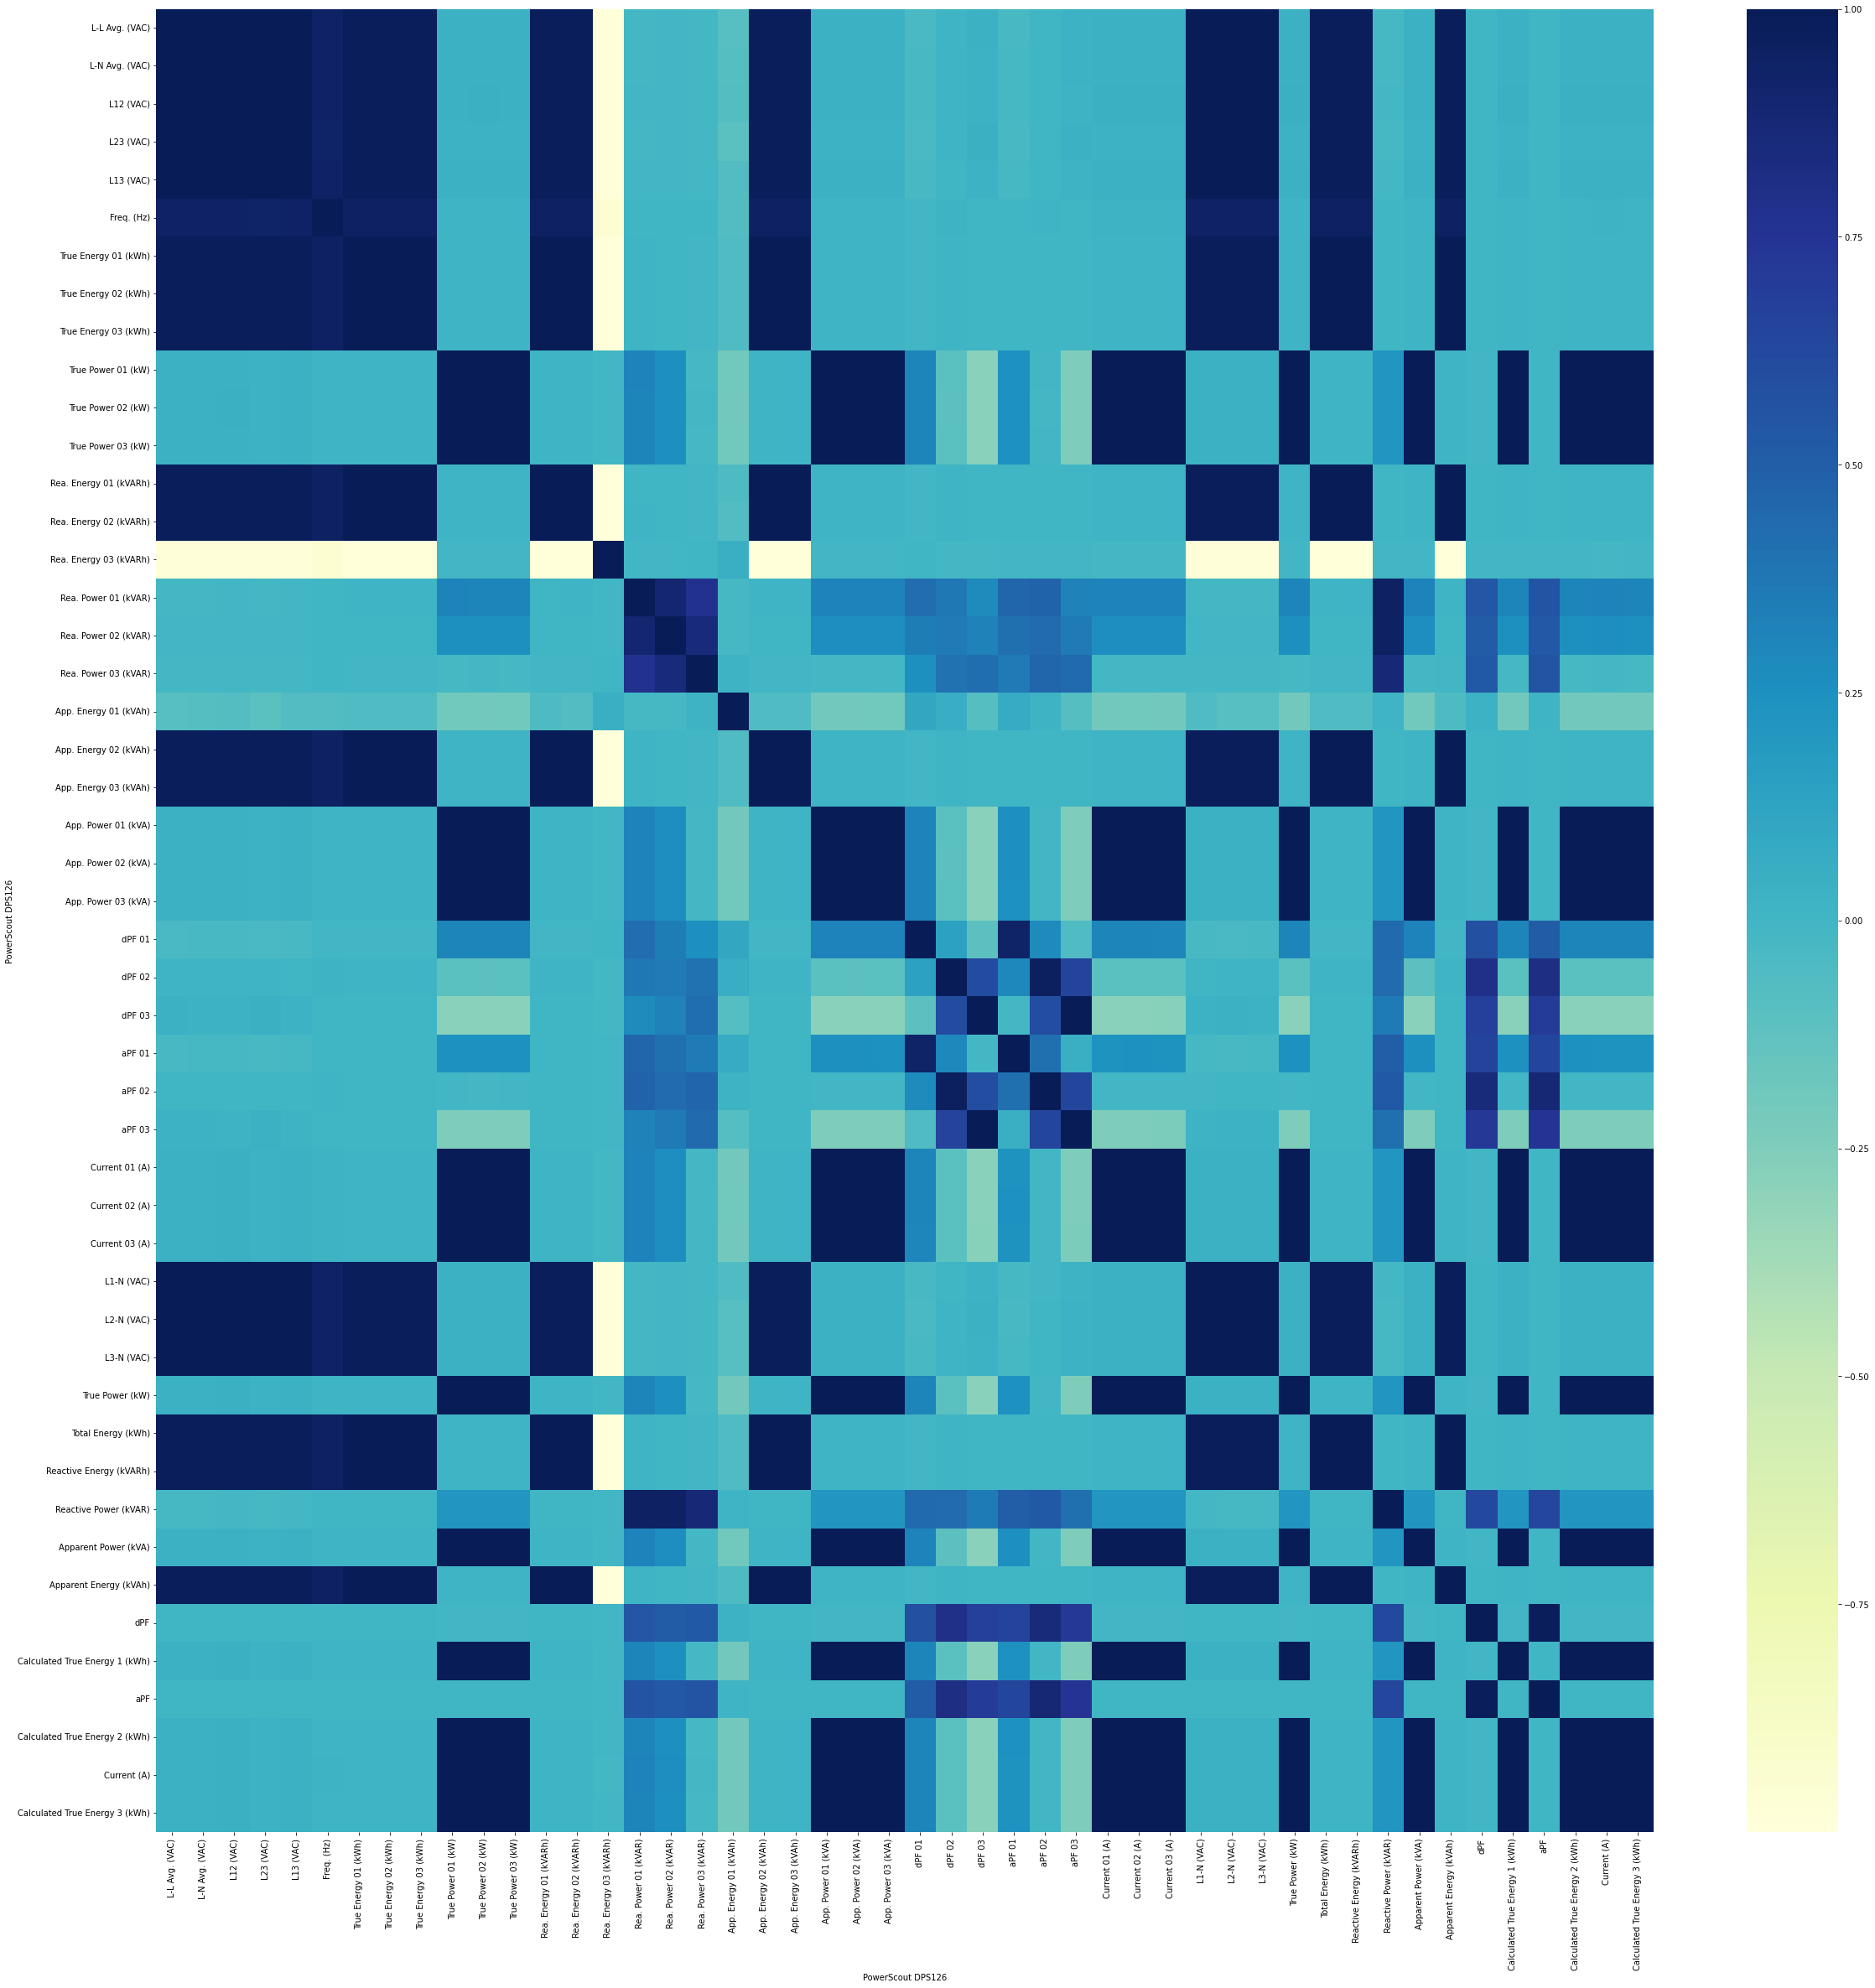

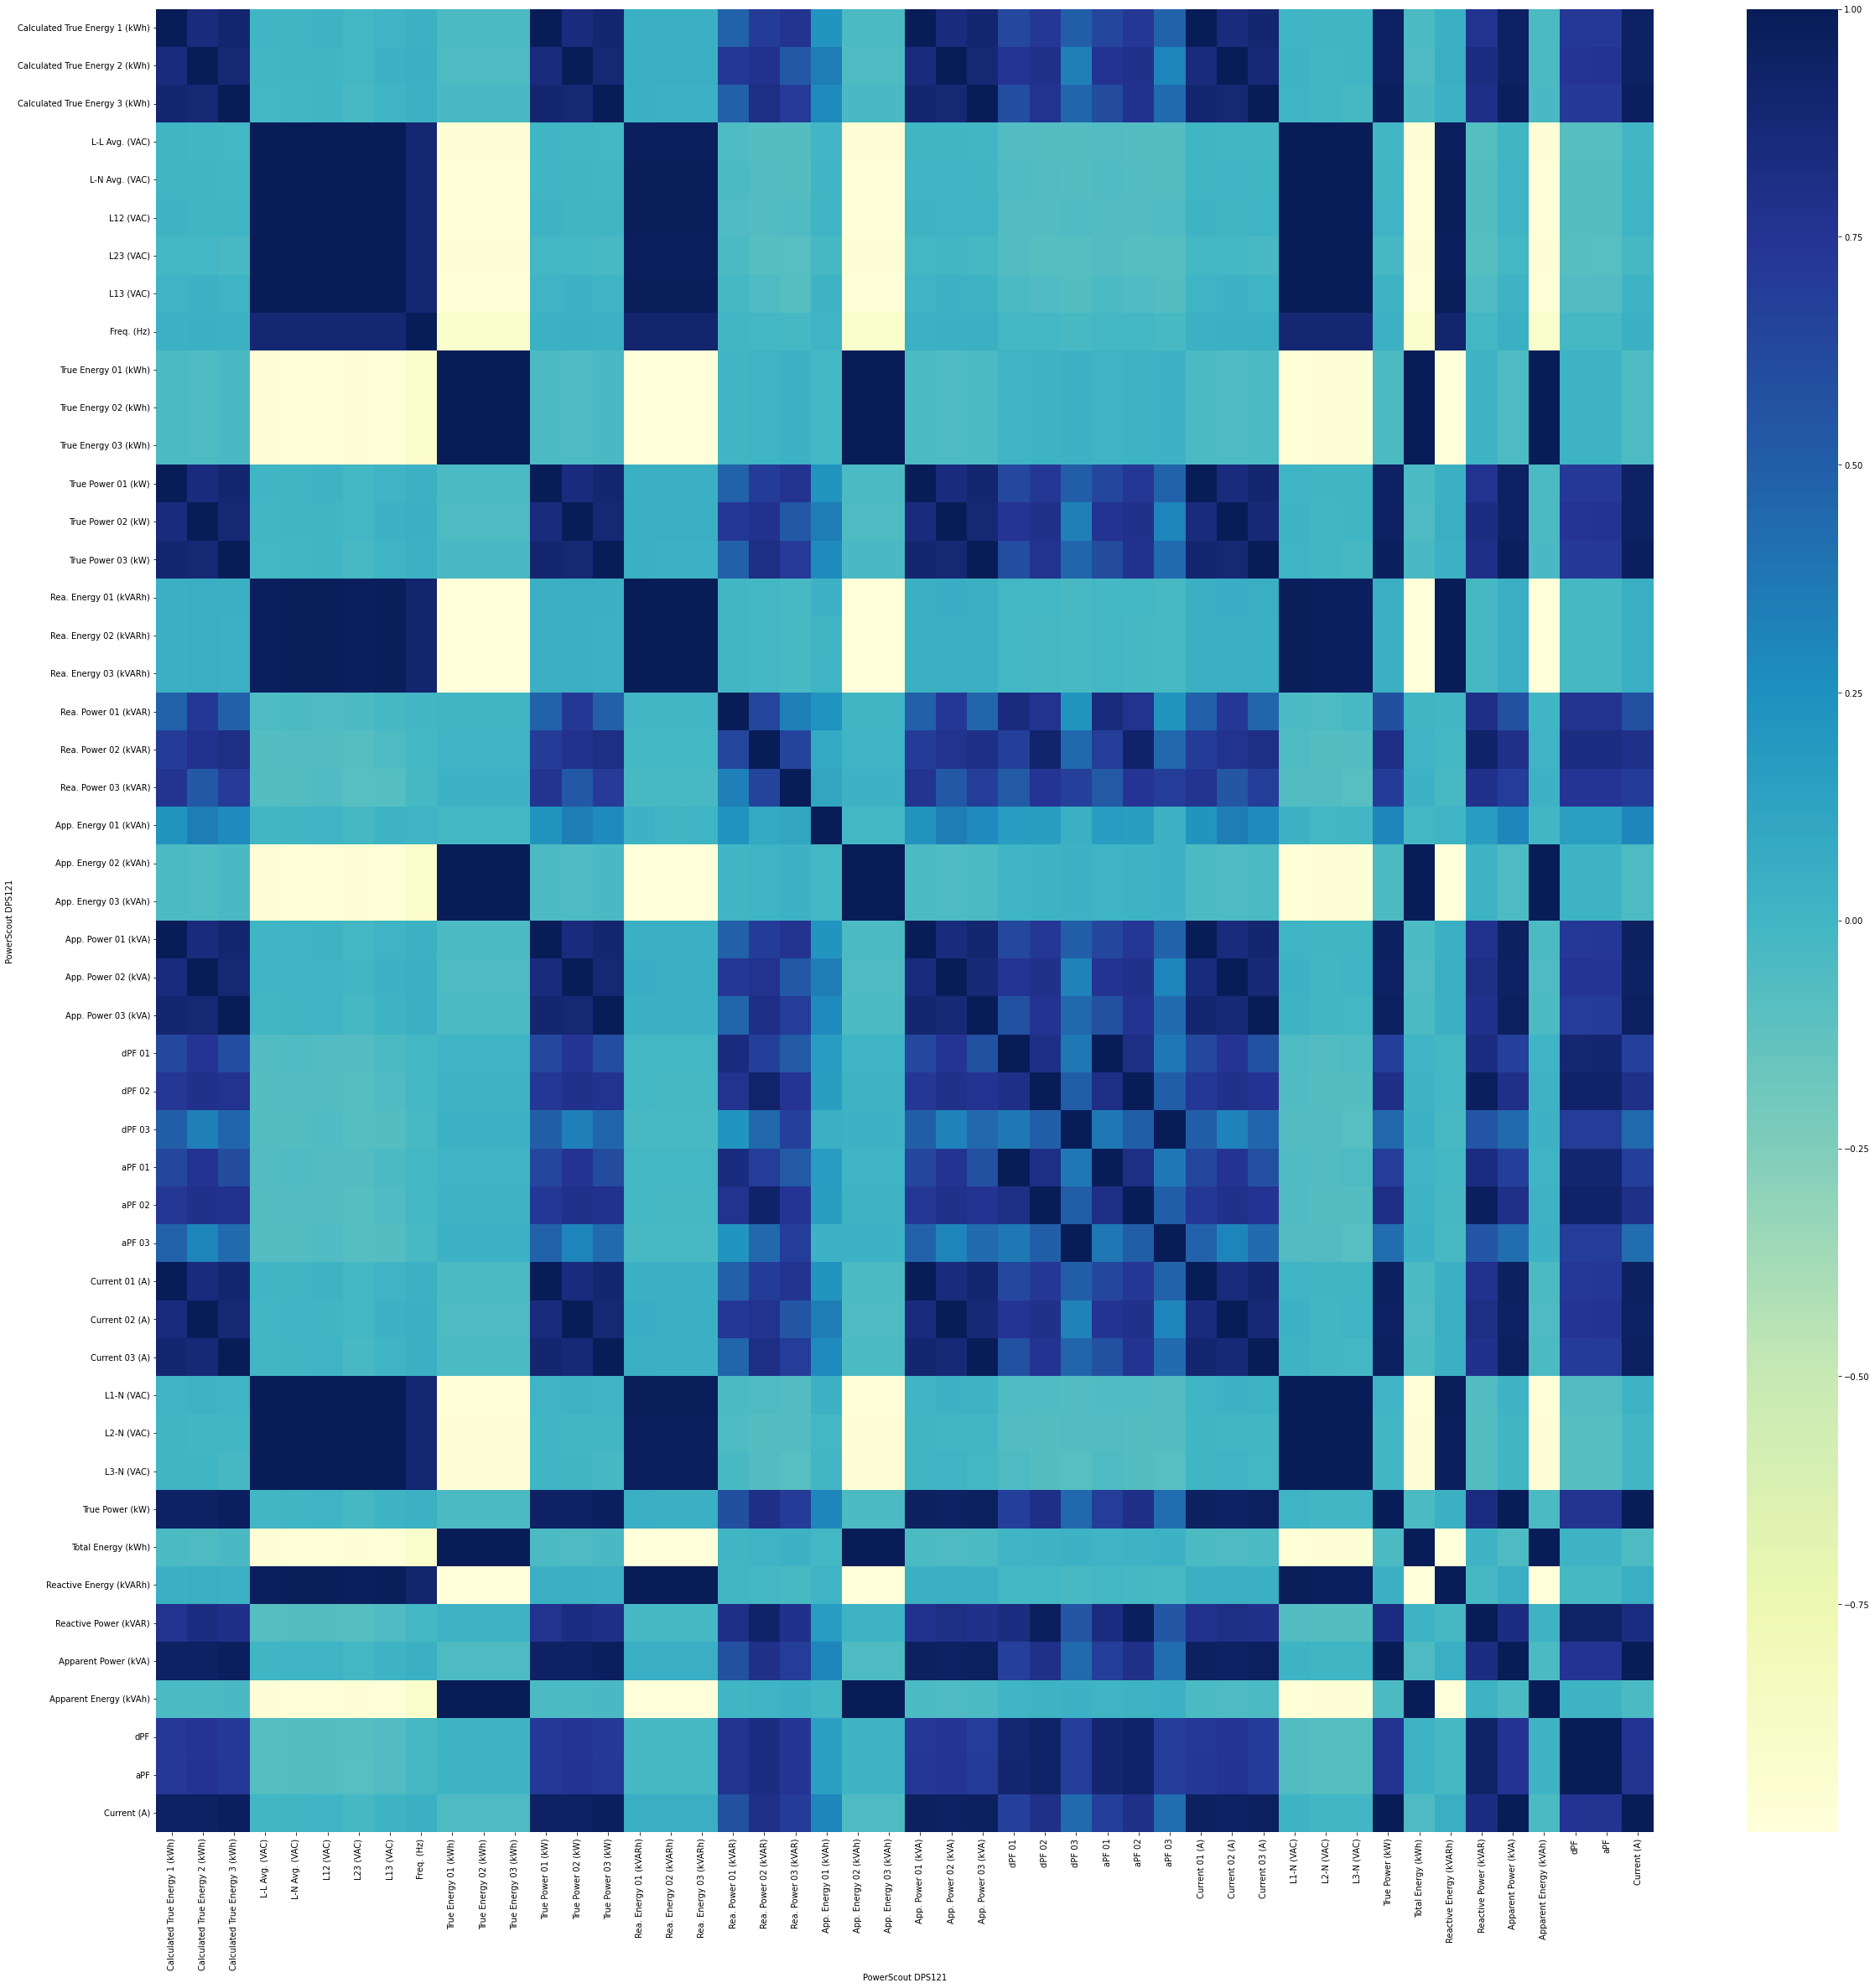

In [4]:
plt.figure(figsize=(40, 40))
hm = sns.heatmap(gross_power['PowerScout DPS126'].corr(), cmap='YlGnBu')
hm.set(xlabel='PowerScout DPS126'
       ,ylabel='PowerScout DPS126'
      )
plt.show()

plt.figure(figsize=(40, 40))
hm = sns.heatmap(gross_power['PowerScout DPS121'].corr(), cmap='YlGnBu')
hm.set(xlabel='PowerScout DPS121'
       ,ylabel='PowerScout DPS121'
      )
plt.show()

In [5]:
gross_power['PowerScout DPS126'].corrwith(gross_power['PowerScout DPS121'])

L-L Avg. (VAC)                    0.715507
L-N Avg. (VAC)                    0.714287
L12 (VAC)                         0.713599
L23 (VAC)                         0.717473
L13 (VAC)                         0.712762
Freq. (Hz)                        0.678308
True Energy 01 (kWh)             -0.706978
True Energy 02 (kWh)             -0.706982
True Energy 03 (kWh)             -0.706974
True Power 01 (kW)                0.055662
True Power 02 (kW)               -0.008261
True Power 03 (kW)                0.075333
Rea. Energy 01 (kVARh)            0.706832
Rea. Energy 02 (kVARh)            0.707218
Rea. Energy 03 (kVARh)           -0.706728
Rea. Power 01 (kVAR)              0.049773
Rea. Power 02 (kVAR)              0.022016
Rea. Power 03 (kVAR)              0.037372
App. Energy 01 (kVAh)             0.875751
App. Energy 02 (kVAh)            -0.706983
App. Energy 03 (kVAh)            -0.706975
App. Power 01 (kVA)               0.052968
App. Power 02 (kVA)              -0.015822
App. Power 

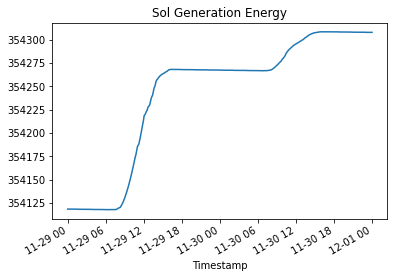

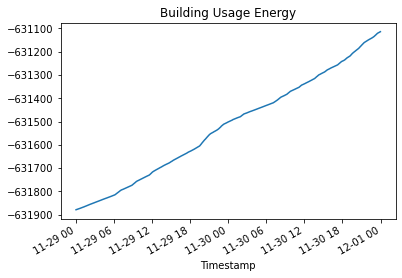

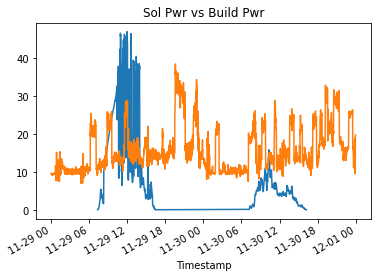

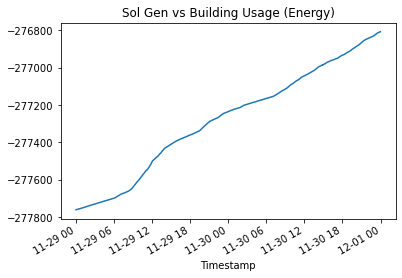

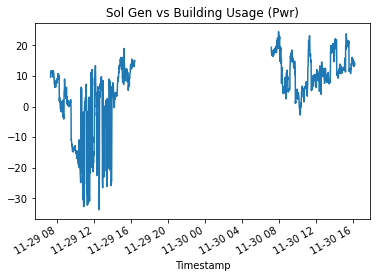

In [61]:
gross_sol_energy = gross_power[gross_power['PowerScout DPS126']['Total Energy (kWh)'] > 0]['PowerScout DPS126']['Total Energy (kWh)']
gross_build_energy = gross_power[gross_power['PowerScout DPS121']['Total Energy (kWh)'] < 0]['PowerScout DPS121']['Total Energy (kWh)'] # neg current flow

gross_sol_pwr = gross_power[gross_power['PowerScout DPS126']['True Power (kW)'] > 0]['PowerScout DPS126']['True Power (kW)']
gross_build_pwr = gross_power[gross_power['PowerScout DPS121']['True Power (kW)'] > 0]['PowerScout DPS121']['True Power (kW)']


# plt.figure(figsize=(10, 10))
gross_sol_energy.plot()
plt.title('Sol Generation Energy')
plt.show()

# plt.figure(figsize=(10, 10))
gross_build_energy.plot()
plt.title('Building Usage Energy')
plt.show()

# plt.figure(figsize=(10, 10))
plt.title('Sol Pwr vs Build Pwr')
gross_sol_pwr.plot()
gross_build_pwr.plot()
plt.show()

plt.title('Sol Gen vs Building Usage (Energy)')
(gross_sol_energy + gross_build_energy).plot()
plt.show()

plt.title('Sol Gen vs Building Usage (Pwr)')
(gross_build_pwr - gross_sol_pwr).plot()
plt.show()